In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Sample dataset load
df = pd.read_csv("/Users/clarawabara/Downloads/TSLA.csv")

In [7]:
df.head()

,Insider Trading,Relationship,Date,Transaction,Cost,Shares,Value ($),Shares Total,SEC Form 4
0,Kirkhorn Zachary,Chief Financial Officer,2022-03-06,Sale,196.72,"10,455","2,056,775","203,073",Mar 07 07:58 PM
1,Taneja Vaibhav,Chief Accounting Officer,2022-03-06,Sale,195.79,"2,466","482,718","100,458",Mar 07 07:57 PM
2,Baglino Andrew D,SVP Powertrain and Energy Eng.,2022-03-06,Sale,195.79,"1,298","254,232","65,547",Mar 07 08:01 PM
3,Taneja Vaibhav,Chief Accounting Officer,2022-03-05,Option Exercise,0.00,"7,138",0,"102,923",Mar 07 07:57 PM
4,Baglino Andrew D,SVP Powertrain and Energy Eng.,2022-03-05,Option Exercise,0.00,"2,586",0,"66,845",Mar 07 08:01 PM


In [9]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Cost
count,156.000000
mean,478.785641
std,448.922903
min,0.000000
25%,50.522500
50%,240.225000
75%,934.107500
max,1171.040000


In [11]:
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Insider Trading  156 non-null    object 
 1   Relationship     156 non-null    object 
 2   Date             156 non-null    object 
 3   Transaction      156 non-null    object 
 4   Cost             156 non-null    float64
 5   Shares           156 non-null    object 
 6   Value ($)        156 non-null    object 
 7   Shares Total     156 non-null    object 
 8   SEC Form 4       156 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.1+ KB


In [13]:
# check null/missing values
df.isnull().sum()

Insider Trading    0
Relationship       0
Date               0
Transaction        0
Cost               0
Shares             0
Value ($)          0
Shares Total       0
SEC Form 4         0
dtype: int64

In [15]:
# Remove duplicate rows if any exist
df = df.drop_duplicates()

# Check if duplicates are removed
print(f"Total rows after removing duplicates: {df.shape[0]}")

Total rows after removing duplicates: 156


In [27]:
# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [57]:
# Convert 'Shares' to numeric, forcing errors to NaN
df['Shares'] = pd.to_numeric(df['Shares'], errors='coerce')

In [59]:
# Convert 'SEC Form 4' to datetime with the correct format
df['Filing Date'] = pd.to_datetime(df['SEC Form 4'], format='%b %d %I:%M %p', errors='coerce')
# Extract only the date (ignoring the time)
df['Filing Date'] = df['Filing Date'].dt.date

Transaction  Option Exercise  Sale
Filing Date                       
1900-01-04               0.0   0.0
1900-01-06               0.0   0.0
1900-01-07               0.0   0.0
1900-01-20               0.0   0.0
1900-01-31               0.0   0.0


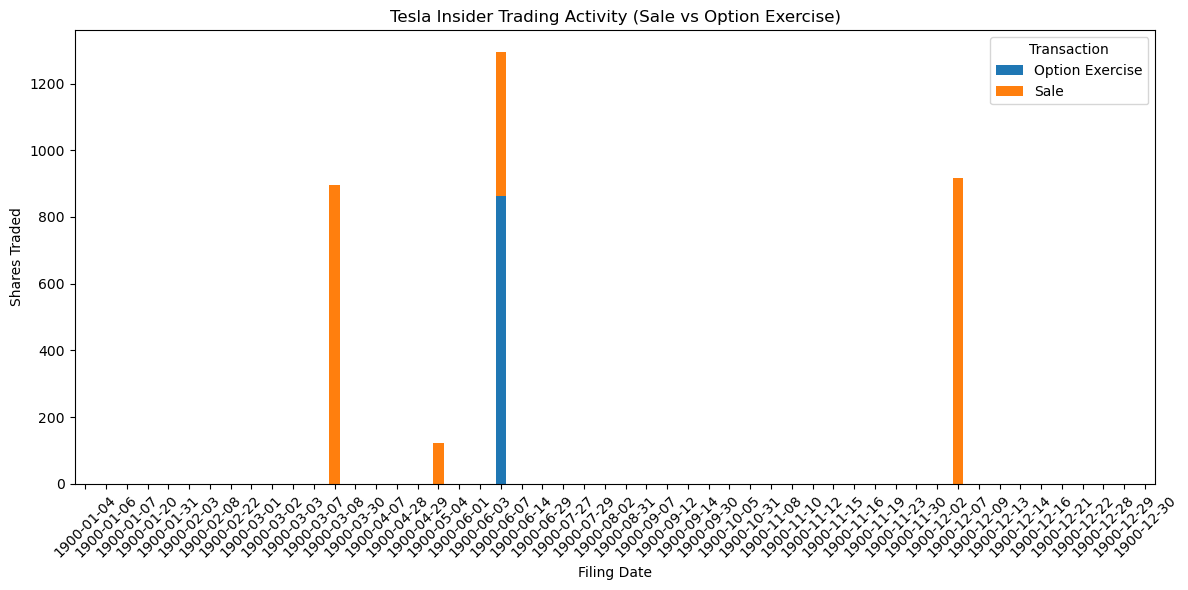

In [61]:
# Group by 'Filing Date' and 'Transaction' and sum shares traded
transaction_activity = df.groupby(['Filing Date', 'Transaction'])['Shares'].sum().unstack().fillna(0)

# Display the summary
print(transaction_activity.head())

# Plot the data as a stacked bar chart to show Sale vs Option Exercise over time
transaction_activity.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Tesla Insider Trading Activity (Sale vs Option Exercise)')
plt.xlabel('Filing Date')
plt.ylabel('Shares Traded')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure the plot fits nicely
plt.show()


In [63]:
# Check the total shares sold vs. exercised over time
total_sales = transaction_activity['Sale'].sum()
total_option_exercises = transaction_activity['Option Exercise'].sum()

print(f'Total Shares Sold: {total_sales}')
print(f'Total Option Exercises: {total_option_exercises}')

# Compare Sale vs Option Exercise transaction counts
transaction_counts = df['Transaction'].value_counts()
print(transaction_counts)

# Further insights (e.g., average shares per transaction)
mean_shares_traded = df['Shares'].mean()
median_shares_traded = df['Shares'].median()

print(f'Mean Shares Traded: {mean_shares_traded}')
print(f'Median Shares Traded: {median_shares_traded}')


Total Shares Sold: 2368.0
Total Option Exercises: 862.0
Transaction
Sale               99
Option Exercise    57
Name: count, dtype: int64
Mean Shares Traded: 646.0
Median Shares Traded: 862.0


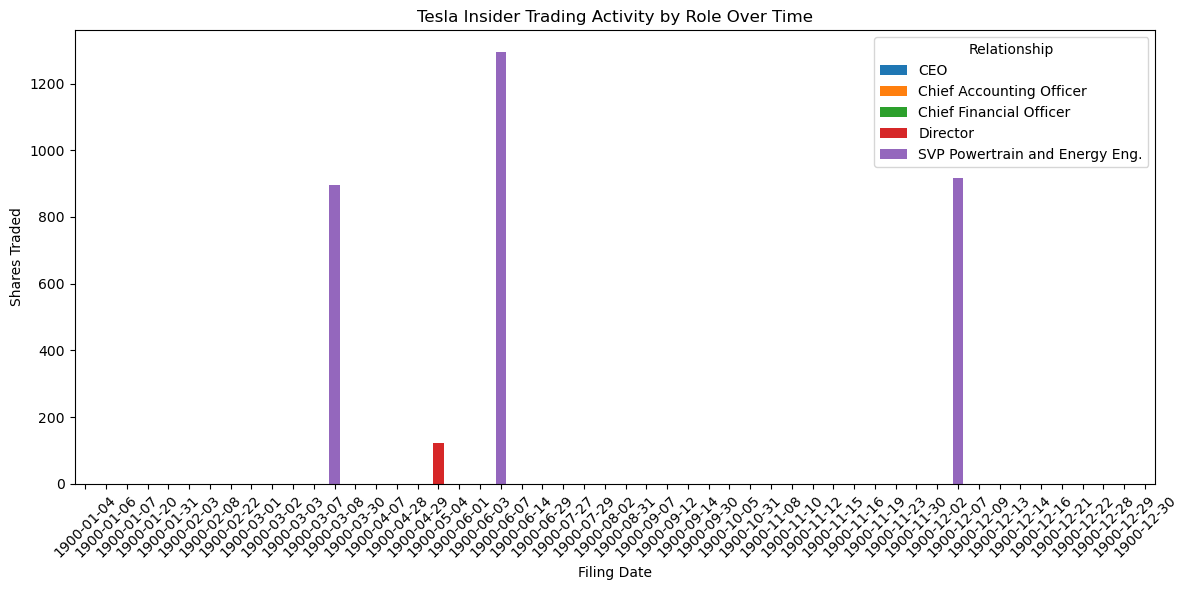

In [65]:
# Plot the insider trading activity by role or transaction type over time (Stacked Bar Chart)
role_activity = df.groupby(['Filing Date', 'Relationship'])['Shares'].sum().unstack().fillna(0)
role_activity.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Tesla Insider Trading Activity by Role Over Time')
plt.xlabel('Filing Date')
plt.ylabel('Shares Traded')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure the plot fits nicely
plt.show()


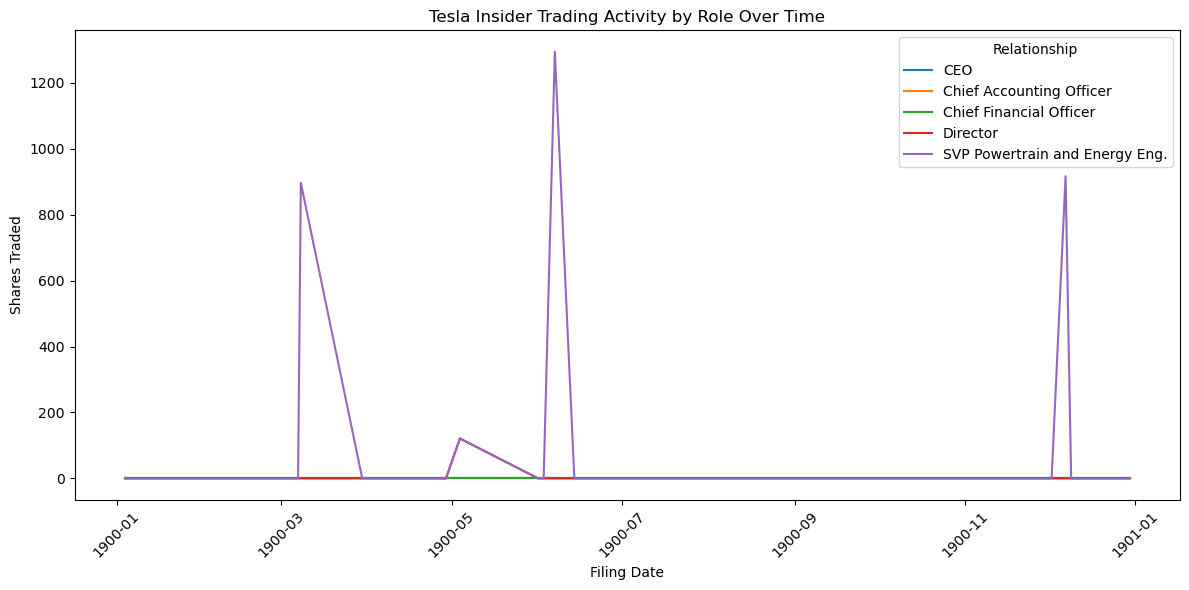

In [67]:
# Alternatively, use a line chart for smoother visualization
role_activity.plot(kind='line', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Tesla Insider Trading Activity by Role Over Time')
plt.xlabel('Filing Date')
plt.ylabel('Shares Traded')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
# Generate a summary of insider trading activities
insider_summary = {
    'Total Shares Sold': total_sales,
    'Total Option Exercises': total_option_exercises,
    'Mean Shares Traded': mean_shares_traded,
    'Median Shares Traded': median_shares_traded,
    'Transaction Type Counts': transaction_counts
}

# Display the summary
for key, value in insider_summary.items():
    print(f"{key}: {value}")

# Save the summary to a CSV file for easy reporting (optional)
insider_summary_df = pd.DataFrame(insider_summary, index=[0])
insider_summary_df.to_csv('insider_summary_report.csv', index=False)


Total Shares Sold: 2368.0
Total Option Exercises: 862.0
Mean Shares Traded: 646.0
Median Shares Traded: 862.0
Transaction Type Counts: Transaction
Sale               99
Option Exercise    57
Name: count, dtype: int64
